Movie Review Sentiment Analysis With Machine Learning

Importing Dependencies 

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import joblib
from collections import Counter
from wordcloud import WordCloud

Load the Data 

In [2]:
data_path = r"C:\Users\janani\OneDrive\Documents\imdb_top_1000.csv"  
data_df = pd.read_csv(data_path)

In [3]:
# Display the first few rows and column names
print("Column names in the dataset:")
data_df.columns

Column names in the dataset:


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
data_df.head()


First few rows of the dataset:


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Preprocessing the Data

In [5]:
def clean_text(text):
    """
    Function to clean text data:
    - Removes non-alphabetic characters
    - Converts text to lowercase
    - Strips leading/trailing whitespaces
    """
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = text.lower()  
    text = text.strip()  
    return text

# Apply text cleaning to the 'Overview' column 
data_df['cleaned_review'] = data_df['Overview'].apply(clean_text)

Sentiment Labeling

In [6]:
# We'll classify based on the IMDB rating: ratings >= 7 are considered positive, others are negative
sentiment_mapping = {'positive': 1, 'negative': 0}
data_df['sentiment_label'] = data_df['IMDB_Rating'].apply(lambda x: 1 if x >= 7 else 0)

Feature Extraction using TF-IDF

In [7]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X = tfidf_vectorizer.fit_transform(data_df['cleaned_review'])  

# Define target variable
y = data_df['sentiment_label']

Split Data into Training and Testing Sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Check distribution of sentiment labels in the training and testing sets
print("\nSentiment label distribution in the training set:")
print(y_train.value_counts())

print("\nSentiment label distribution in the test set:")
print(y_test.value_counts())


Sentiment label distribution in the training set:
sentiment_label
1    800
Name: count, dtype: int64

Sentiment label distribution in the test set:
sentiment_label
1    200
Name: count, dtype: int64


In [10]:
# Step 6: Handle Imbalanced Classes 
if y_train.value_counts().min() / y_train.value_counts().max() < 0.2:
    print("\nHandling class imbalance using SMOTE...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("\nResampled Sentiment label distribution in the training set:")
    print(pd.Series(y_train).value_counts())

Train the Model

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Evaluate the Model
# Training accuracy
train_predictions = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"\nTraining Accuracy: {train_accuracy:.2f}")


Training Accuracy: 1.00


In [13]:
# Testing accuracy
test_predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"\nTesting Accuracy: {test_accuracy:.2f}")


Testing Accuracy: 1.00


In [14]:
# Check if both classes are represented in y_test and predictions
print(f"Unique classes in y_test: {y_test.unique()}")
print(f"Unique classes in predictions: {set(test_predictions)}")

# Classification report with zero_division=1 to handle undefined metrics
print("\nClassification Report:\n")
print(classification_report(y_test, test_predictions, labels=[0, 1], target_names=['negative', 'positive'], zero_division=1))

Unique classes in y_test: [1]
Unique classes in predictions: {1}

Classification Report:

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         0
    positive       1.00      1.00      1.00       200

   micro avg       1.00      1.00      1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



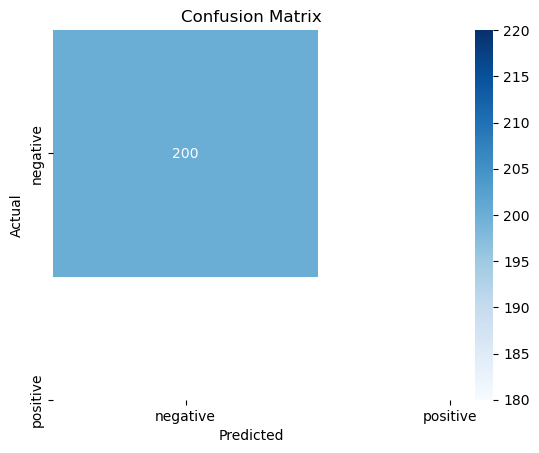

In [15]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Show dataset information and outputs
# 1. Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
data_df.describe()


Basic statistics of the dataset:


,IMDB_Rating,Meta_score,No_of_Votes,sentiment_label
count,1000.000000,843.000000,1.000000e+03,1000.0
mean,7.949300,77.971530,2.736929e+05,1.0
std,0.275491,12.376099,3.273727e+05,0.0
min,7.600000,28.000000,2.508800e+04,1.0
25%,7.700000,70.000000,5.552625e+04,1.0
50%,7.900000,79.000000,1.385485e+05,1.0
75%,8.100000,87.000000,3.741612e+05,1.0
max,9.300000,100.000000,2.343110e+06,1.0


In [17]:
# 2. Display cleaned reviews sample with sentiment labels
print("\nSample of cleaned reviews with sentiment labels:")
print(data_df[['cleaned_review', 'sentiment_label']].head())


Sample of cleaned reviews with sentiment labels:
                                      cleaned_review  sentiment_label
0  two imprisoned men bond over a number of years...                1
1  an organized crime dynastys aging patriarch tr...                1
2  when the menace known as the joker wreaks havo...                1
3  the early life and career of vito corleone in ...                1
4  a jury holdout attempts to prevent a miscarria...                1


In [18]:
# 3. Most frequent words in the cleaned reviews
word_freq = Counter(" ".join(data_df['cleaned_review']).split())
most_common_words = word_freq.most_common(10)
print("\nMost frequent words in the cleaned reviews:")
most_common_words


Most frequent words in the cleaned reviews:


[('a', 1610),
 ('the', 1206),
 ('to', 803),
 ('of', 779),
 ('and', 697),
 ('in', 565),
 ('his', 516),
 ('an', 291),
 ('is', 245),
 ('with', 242)]

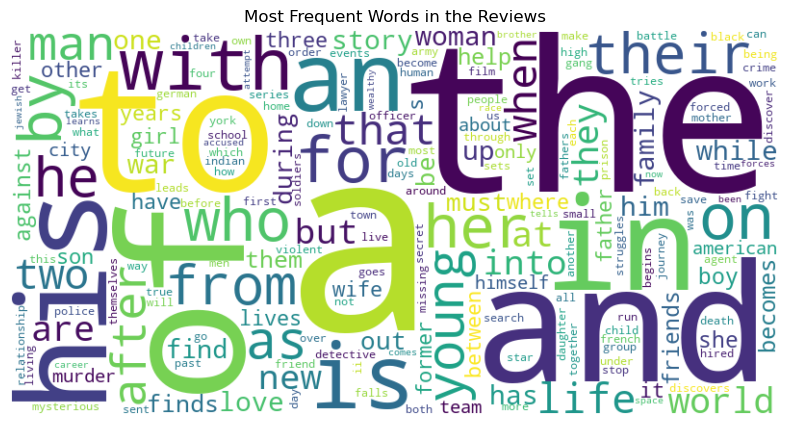

In [19]:
# WordCloud visualization of frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in the Reviews')
plt.axis('off')
plt.show()

In [20]:
# Save the Trained Model and TF-IDF Vectorizer
joblib.dump(rf_model, 'sentiment_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

print("\nModel and vectorizer saved successfully.")


Model and vectorizer saved successfully.
